In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder , OneHotEncoder
from sklearn.metrics import accuracy_score , confusion_matrix 
from xgboost import XGBClassifier
from sklearn.svm import SVC
import time
%matplotlib inline

In [2]:
df = pd.read_csv("C:\\Users\\Siddharth Bingi\\Documents\\Sabir ML\\Assignment 2\\sgemm_product_dataset\\sgemm_product.csv")

In [3]:
df["avg_run"] = df.iloc[:,14:].mean(axis = 1)

median_run = df['avg_run'].median()

df.loc[df['avg_run'] >= median_run, 'run_class'] = 1
df.loc[df['avg_run'] < median_run, 'run_class'] = 0

df.drop(['Run1 (ms)', 'Run2 (ms)','Run3 (ms)', 'Run4 (ms)', 'avg_run'], axis = 1, inplace = True)
df.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,run_class
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,1.0
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,1.0
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,1.0
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,1.0
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,1.0


In [4]:
# defining feature matrix(X) and response vector(y) 
X = df.iloc[:, 0:14]
y = df["run_class"]
  


# splitting X and y into training and testing sets 
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5,random_state=1) 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [5]:
X_train.shape

(120800, 14)

In [11]:
## Accuracy Plots
def plot_accuracy(param, acc_train, acc_test, title, xlab, ylab):
    plt.plot(param,acc_train,marker='o',markersize=6,color='blue',label='train')
    plt.plot(param,acc_test,marker='o',markersize=6,color='red',label='test')
    plt.title(title)
    plt.xlabel(xlab)
    plt.grid()
    plt.ylabel(ylab)
    plt.legend()
    plt.show()

In [12]:
## Run time plots
def plot_run_time(param, run_time, title, xlab, ylab):
    plt.plot(param,run_time,marker='o',markersize=6,color='blue')
    plt.title(title)
    plt.xlabel(xlab)
    plt.grid()
    plt.ylabel(ylab)
    plt.show()

# SVM with polynomial kernel with different degrees

In [27]:
### clock rate for one full epoch for differnet values of degrees of poly
poly_degree = np.arange(1,11,1)
poly_degree_acc_train = []
poly_degree_acc_test = []
poly_degree_run_time = []
for i in poly_degree:
    print("---- SVM with degree :", i, "----")
    start = time.time()
    poly_svm = SVC(kernel='poly', degree= i, gamma='auto',random_state=5)
    poly_svm.fit(X_train , y_train)
    poly_degree_run_time.append(time.time() - start)
    y_pred_train = poly_svm.predict(X_train)
    y_pred_test = poly_svm.predict(X_test)
    poly_degree_acc_train.append(accuracy_score(y_train,y_pred_train))
    poly_degree_acc_test.append(accuracy_score(y_test,y_pred_test))

---- SVM with degree : 1 ----
---- SVM with degree : 2 ----
---- SVM with degree : 3 ----
---- SVM with degree : 4 ----
---- SVM with degree : 5 ----
---- SVM with degree : 6 ----
---- SVM with degree : 7 ----
---- SVM with degree : 8 ----
---- SVM with degree : 9 ----
---- SVM with degree : 10 ----


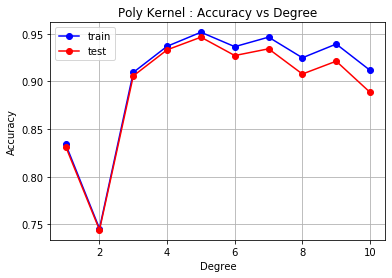

In [28]:
plot_accuracy(poly_degree,poly_degree_acc_train, poly_degree_acc_test,
             "Poly Kernel : Accuracy vs Degree", 'Degree', 'Accuracy')

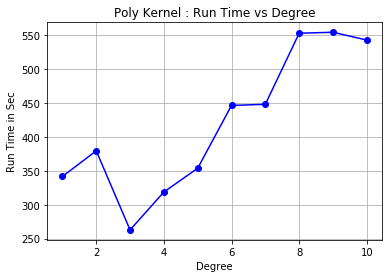

In [29]:
plot_run_time(poly_degree, poly_degree_run_time, 'Poly Kernel : Run Time vs Degree', 'Degree', 'Run Time in Sec')

# SVM with different kernels

In [15]:
### clock rate for one full epoch for differnet values of degrees of poly
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
diff_kernels_acc_train = []
diff_kernels_acc_test = []
diff_kernels_run_time = []
for i in range(len(kernels)):
    print("---- SVM with kernel :", kernels[i], "----")
    start = time.time()
    poly_svm = SVC(kernel= kernels[i] ,gamma='auto', random_state=5)
    poly_svm.fit(X_train , y_train)
    diff_kernels_run_time.append(time.time() - start)
    y_pred_train = poly_svm.predict(X_train)
    y_pred_test = poly_svm.predict(X_test)
    diff_kernels_acc_train.append(accuracy_score(y_train,y_pred_train))
    diff_kernels_acc_test.append(accuracy_score(y_test,y_pred_test))

---- SVM with kernel : linear ----
---- SVM with kernel : poly ----
---- SVM with kernel : rbf ----
---- SVM with kernel : sigmoid ----


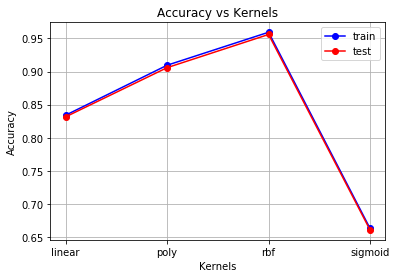

In [18]:
plot_accuracy(kernels,diff_kernels_acc_train, diff_kernels_acc_test,
             "Accuracy vs Kernels", 'Kernels', 'Accuracy')

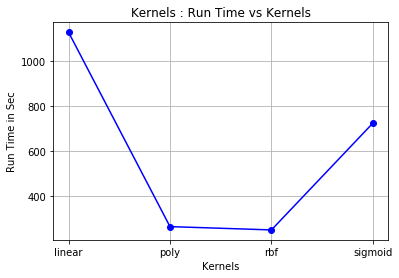

In [19]:
plot_run_time(kernels, diff_kernels_run_time, 'Kernels : Run Time vs Kernels', 'Kernels', 'Run Time in Sec')

# SVM with different gamma values for Gaussian radial basis function (RBF) kernel

gamma: Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’. Higher the value of gamma, will try to exact fit the as per training data set i.e. generalization error and cause over-fitting problem.

In [20]:
gamma_values = ['auto', 1, 10, 100]
gamma_acc_train = []
gamma_acc_test = []
gamma_run_time = []
for i in range(len(gamma_values)):
    print("---- SVM with rbf kernal for gamma value :", gamma_values[i], "----")
    start = time.time()
    poly_svm = SVC(kernel= 'rbf' ,gamma= gamma_values[i], random_state=5)
    poly_svm.fit(X_train , y_train)
    gamma_run_time.append(time.time() - start)
    y_pred_train = poly_svm.predict(X_train)
    y_pred_test = poly_svm.predict(X_test)
    gamma_acc_train.append(accuracy_score(y_train,y_pred_train))
    gamma_acc_test.append(accuracy_score(y_test,y_pred_test))

---- SVM with rbf kernal for gamma value : auto ----
---- SVM with rbf kernal for gamma value : 1 ----
---- SVM with rbf kernal for gamma value : 10 ----
---- SVM with rbf kernal for gamma value : 100 ----


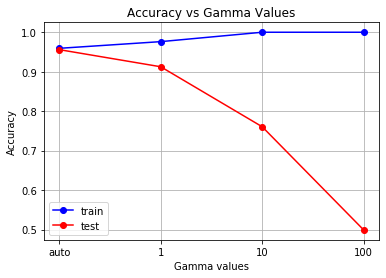

In [21]:
plot_accuracy(gamma_values,gamma_acc_train, gamma_acc_test,
             "Accuracy vs Gamma Values", 'Gamma values', 'Accuracy')

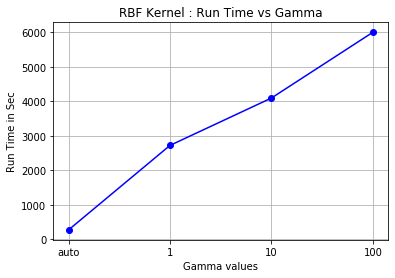

In [22]:
plot_run_time(gamma_values, gamma_run_time, 'RBF Kernel : Run Time vs Gamma', 'Gamma values', 'Run Time in Sec')

# SVM with different Penalty parameter C for Gaussian radial basis function (RBF) kernel

C: Penalty parameter C of the error term. It also controls the trade-off between smooth decision boundaries and classifying the training points correctly.

In [8]:
penalty = [1, 10, 100]
penalty_acc_train = []
penalty_acc_test = []
penalty_run_time = []
for i in range(len(penalty)):
    print("---- SVM with rbf kernal for penalty C values :", penalty[i], "----")
    start = time.time()
    poly_svm = SVC(C= penalty[i], kernel= 'rbf' ,gamma= 'auto', random_state=5)
    poly_svm.fit(X_train , y_train)
    penalty_run_time.append(time.time() - start)
    y_pred_train = poly_svm.predict(X_train)
    y_pred_test = poly_svm.predict(X_test)
    penalty_acc_train.append(accuracy_score(y_train,y_pred_train))
    penalty_acc_test.append(accuracy_score(y_test,y_pred_test))

---- SVM with rbf kernal for penalty C values : 1 ----
---- SVM with rbf kernal for penalty C values : 10 ----
---- SVM with rbf kernal for penalty C values : 100 ----


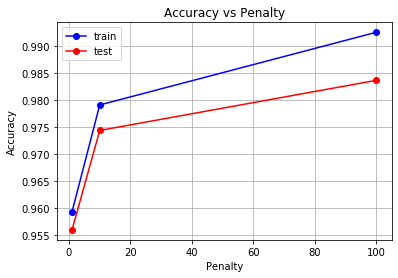

In [13]:
plot_accuracy(penalty,penalty_acc_train, penalty_acc_test,
             "Accuracy vs Penalty", 'Penalty', 'Accuracy')

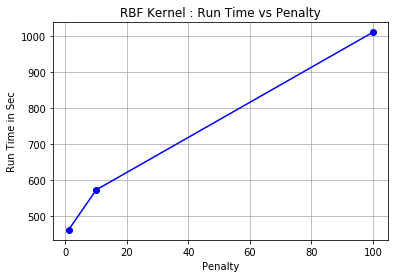

In [14]:
plot_run_time(penalty, penalty_run_time, 'RBF Kernel : Run Time vs Penalty', 'Penalty', 'Run Time in Sec')

# K-fold Cross validation 

In [23]:
# Applying k-Fold Cross Validation
# Number of folds = 10
from sklearn.model_selection import cross_val_score

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
mean_accuracy_kernels = []

for i in range(len(kernels)): 
    print("---- Running Cross validation for kernel : ", kernels[i], "----")
    score = cross_val_score(estimator = SVC(kernel = kernels[i], gamma = 'auto', random_state = 5), 
                               X = X_train, y = y_train, cv = 10)
    mean_accuracy_kernels.append(score.mean())

---- Running Cross validation for kernel :  linear ----
---- Running Cross validation for kernel :  poly ----
---- Running Cross validation for kernel :  rbf ----
---- Running Cross validation for kernel :  sigmoid ----


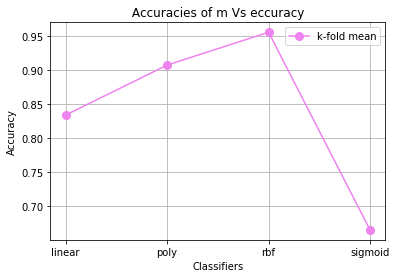

In [24]:
# Plotting the mean accuracies found from cross validtion and test set accuracy
plt.plot(kernels , mean_accuracy_kernels , marker ='o', markersize = 8 , color ='violet',label='k-fold mean')
#plt.plot(range_svm , test_acc,  marker ='o', markersize = 8 , color ='black',label='Test set accuracy')
plt.title(" Accuracies of m Vs eccuracy ")
plt.xlabel("Classifiers")
plt.grid()
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Testing for different folds in cross validation

In [25]:
# Applying k-Fold Cross Validation on TRAIN dataset

from sklearn.model_selection import cross_val_score

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
folds = list(range(2,12,2))
mean_accuracy_kernel_folds = []
mean_accuracy_folds = []


for i in range(len(kernels)):
    print("---- Running Cross validation for kernel : ", kernels[i], "----")
    for j in range(len(folds)):
        print("---- Running Cross validation for folds : ", folds[j], "----")
        score = cross_val_score(estimator = SVC(kernel = kernels[i], gamma = 'auto', random_state = 5), 
                                   X = X_train, y = y_train, cv = folds[j])
        
        mean_accuracy_folds.append(score.mean())
    
    mean_accuracy_kernel_folds.append(mean_accuracy_folds)
    mean_accuracy_folds = []

---- Running Cross validation for kernel :  linear ----
---- Running Cross validation for folds :  2 ----
---- Running Cross validation for folds :  4 ----
---- Running Cross validation for folds :  6 ----
---- Running Cross validation for folds :  8 ----
---- Running Cross validation for folds :  10 ----
---- Running Cross validation for kernel :  poly ----
---- Running Cross validation for folds :  2 ----
---- Running Cross validation for folds :  4 ----
---- Running Cross validation for folds :  6 ----
---- Running Cross validation for folds :  8 ----
---- Running Cross validation for folds :  10 ----
---- Running Cross validation for kernel :  rbf ----
---- Running Cross validation for folds :  2 ----
---- Running Cross validation for folds :  4 ----
---- Running Cross validation for folds :  6 ----
---- Running Cross validation for folds :  8 ----
---- Running Cross validation for folds :  10 ----
---- Running Cross validation for kernel :  sigmoid ----
---- Running Cross validati

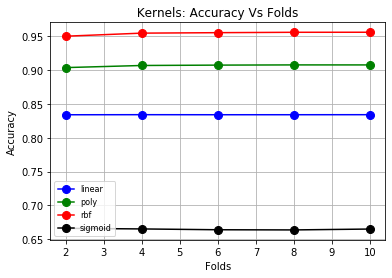

In [26]:
# Plotting the mean accuracies found from cross validtion and test set accuracy
colors = ['blue', 'green', 'red', 'black']
for i in range(len(kernels)):
    plt.plot(folds , mean_accuracy_kernel_folds[i] , marker ='o', markersize = 8 , color =colors[i],label=kernels[i])

plt.title(" Kernels: Accuracy Vs Folds ")
plt.xlabel("Folds")
plt.grid()
plt.ylabel("Accuracy")
plt.legend(prop={'size': 8})
plt.show()